In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, sep='\n')
print(x_test.shape, y_test.shape, sep='\n')

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


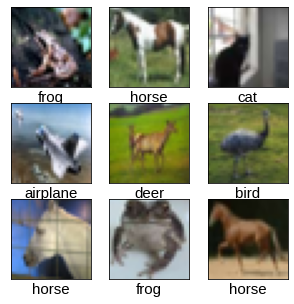

In [ ]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(50000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap='gray')
    plt.xlabel(class_names[int(y_train[idx])], fontsize=15)

plt.style.use("seaborn")
plt.show()

In [ ]:
# z-score normalization + validation set 

x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, x_val.shape)

(35000, 32, 32, 3) (15000, 32, 32, 3)


**모델 구성**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

**모델 학습 과정 설정(compile)**

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30 , batch_size=32 , validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.6285 - acc: 0.4127 - val_loss: 1.4089 - val_acc: 0.5028
Epoch 2/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2675 - acc: 0.5465 - val_loss: 1.1950 - val_acc: 0.5801
Epoch 3/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0933 - acc: 0.6133 - val_loss: 1.1115 - val_acc: 0.6071
Epoch 4/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.9670 - acc: 0.6605 - val_loss: 1.0201 - val_acc: 0.6423
Epoch 5/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8711 - acc: 0.6961 - val_loss: 0.9309 - val_acc: 0.6753
Epoch 6/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7832 - acc: 0.7281 - val_loss: 0.9139 - val_acc: 0.6858
Epoch 7/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7040 - acc: 0.7555 - val_loss: 0.8761 - val_acc: 0.6956
Epoch 8/30
1094/1094 [==============================] - 5s 5ms

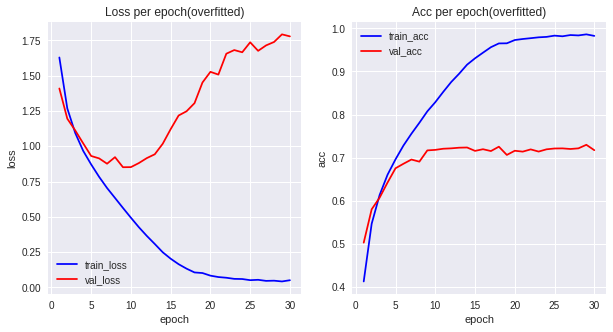

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(overfitted)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(overfitted)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

**Overfitting 완화**

**1. Regularizer (weight_decay)**

- L2, L1, ElasticNet




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

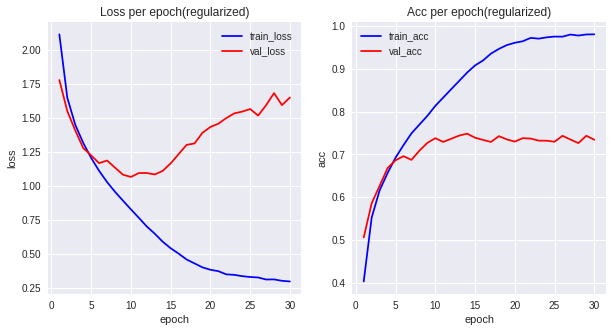

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30 , batch_size=32 , validation_data=(x_val, y_val))

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(regularized)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(regularized)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

**2. Dropout**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 2.2562 - acc: 0.3608 - val_loss: 1.8918 - val_acc: 0.4716
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.7875 - acc: 0.5052 - val_loss: 1.6649 - val_acc: 0.5377
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.5821 - acc: 0.5670 - val_loss: 1.4689 - val_acc: 0.6009
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.4392 - acc: 0.6089 - val_loss: 1.3738 - val_acc: 0.6271
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.3324 - acc: 0.6402 - val_loss: 1.2544 - val_acc: 0.6657
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2434 - acc: 0.6660 - val_loss: 1.2305 - val_acc: 0.6693
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1637 - acc: 0.6918 - val_loss: 1.1304 - val_acc: 0.7011
Epoch 8/30
1094/1094 [==============================] - 6s 5ms

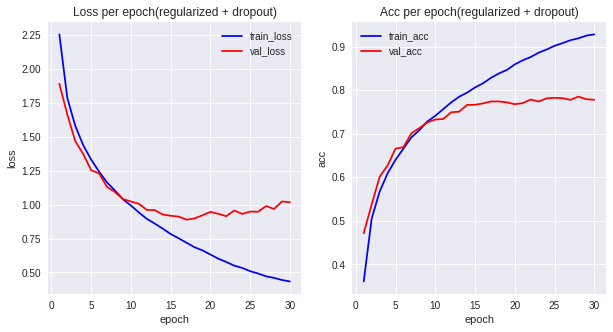

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30 , batch_size=32 , validation_data=(x_val, y_val))

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(regularized + dropout)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(regularized + dropout)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

**3. Batch_normalization**

- 1. [conv - B.N - activation] - pooling
- 2. [conv - activation - B.N] - pooling

In [ ]:
# 1. [conv - B.N - activation] - pooling - Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))

Epoch 1/30
1094/1094 [==============================] - 7s 7ms/step - loss: 2.3406 - acc: 0.3936 - val_loss: 2.1965 - val_acc: 0.4435
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.9221 - acc: 0.5331 - val_loss: 1.9545 - val_acc: 0.5201
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.7059 - acc: 0.5991 - val_loss: 1.7719 - val_acc: 0.5700
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.5467 - acc: 0.6420 - val_loss: 1.5071 - val_acc: 0.6442
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.4200 - acc: 0.6740 - val_loss: 1.3299 - val_acc: 0.6990
Epoch 6/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3166 - acc: 0.7009 - val_loss: 1.3772 - val_acc: 0.6777
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2268 - acc: 0.7209 - val_loss: 1.2035 - val_acc: 0.7289
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

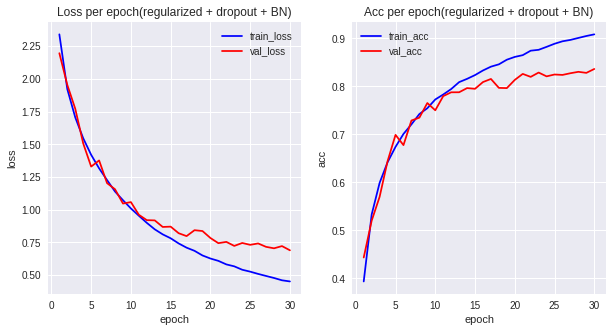

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30 , batch_size=32 , validation_data=(x_val, y_val))

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(regularized + dropout + BN)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(regularized + dropout + BN)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

In [ ]:
# 2. [conv - activation - B.N] - pooling - Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

Epoch 1/30
1094/1094 [==============================] - 7s 6ms/step - loss: 2.4700 - acc: 0.3826 - val_loss: 2.1545 - val_acc: 0.4637
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 2.0016 - acc: 0.5185 - val_loss: 1.9158 - val_acc: 0.5495
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.8069 - acc: 0.5803 - val_loss: 1.7511 - val_acc: 0.5917
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.6535 - acc: 0.6281 - val_loss: 1.5903 - val_acc: 0.6418
Epoch 5/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.5292 - acc: 0.6587 - val_loss: 1.4766 - val_acc: 0.6747
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.4129 - acc: 0.6935 - val_loss: 1.3584 - val_acc: 0.7055
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.3155 - acc: 0.7169 - val_loss: 1.2533 - val_acc: 0.7338
Epoch 8/30
1094/1094 [==============================] - 7s 6ms

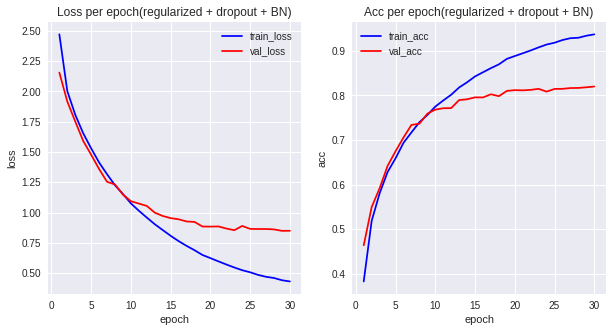

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30 , batch_size=32 , validation_data=(x_val, y_val))

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(regularized + dropout + BN)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(regularized + dropout + BN)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

**4. Performance upgrade using data augmentation**

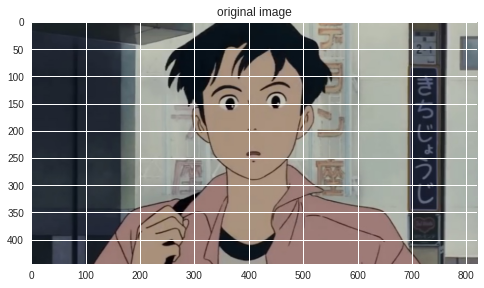

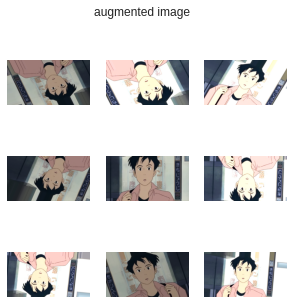

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 이미지 제네레이터를 선언
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

# test용 사진을 load
boy = img_to_array(load_img('./boy.jpeg')).astype(np.uint8)
plt.figure(); plt.title('original image')
plt.imshow(boy)

# 제네레이터를 사용해서 이미지를 변환
boy = boy.reshape((1, ) + boy.shape)
train_generator = train_datagen.flow(boy, batch_size = 1)

fig = plt.figure(figsize = (5, 5))
fig.suptitle('augmented image')

for i in range(9):
    data = next(train_generator) # 제네레이터에게서 이미지를 받아옴
    image = data[0]
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
    
plt.show()

In [ ]:
# augmented data set 생성
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

# 검증 데이터셋에는 변환을 사용하지 않음 (train, val set에만 generation set 이용해 dataset 완성)
val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train,
                                    batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val,
                                batch_size = batch_size)

In [ ]:
# 1. [conv - B.N - activation] - pooling

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# optimizer 설정 시, learning_rate 설정 가능
# sparse_categorical_crossentropy : 0~9 label이 one-hot encoding 안 된 상태에서 적용가능한 categorical crossentropy
model.compile(optimizer= Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

with tf.device('/device:GPU:0'):
    history = model.fit(train_generator, epochs=100 , batch_size=32 , validation_data=val_generator)

hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(regularized + dropout + BN)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(regularized + dropout + BN)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

Epoch 1/100
1094/1094 [==============================] - 19s 17ms/step - loss: 2.4652 - acc: 0.1176 - val_loss: 2.1235 - val_acc: 0.1084
Epoch 2/100
1094/1094 [==============================] - 19s 17ms/step - loss: 2.1476 - acc: 0.0930 - val_loss: 1.9265 - val_acc: 0.0831
Epoch 3/100
1094/1094 [==============================] - 19s 17ms/step - loss: 1.9795 - acc: 0.0923 - val_loss: 1.9548 - val_acc: 0.0623
Epoch 4/100
1094/1094 [==============================] - 19s 17ms/step - loss: 1.8479 - acc: 0.0951 - val_loss: 1.7201 - val_acc: 0.0577
Epoch 5/100
1094/1094 [==============================] - 19s 17ms/step - loss: 1.7415 - acc: 0.0963 - val_loss: 1.9969 - val_acc: 0.0609
Epoch 6/100
1094/1094 [==============================] - 19s 17ms/step - loss: 1.6512 - acc: 0.0965 - val_loss: 1.5751 - val_acc: 0.0679
Epoch 7/100
1094/1094 [==============================] - 19s 17ms/step - loss: 1.5578 - acc: 0.0983 - val_loss: 1.5163 - val_acc: 0.0851
Epoch 8/100
1094/1094 [==================

KeyboardInterrupt: ignored